# NYPD Arrest Data (Year to Date)
## Brendan Tang

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date__20231203.csv", 
                 parse_dates = True, 
                 infer_datetime_format = True, 
                 low_memory=False)

/var/folders/mr/3rp6nsn120d5z44_dyb87mxm0000gn/T/ipykernel_15479/1623682073.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date__20231203.csv",


In [3]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)


In [4]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                         int64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [5]:
filtered_df = df[['ARREST_DATE', 'PD_DESC', 'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude']]
filtered_df

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,01/01/2023,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,45-64,F,BLACK,40.677426,-73.945615
1,02/03/2023,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,F,K,25-44,M,BLACK,40.655923,-73.909650
2,02/15/2023,STRANGULATION 1ST,FELONY ASSAULT,F,K,25-44,M,WHITE,40.602468,-74.007120
3,01/04/2023,STRANGULATION 1ST,FELONY ASSAULT,F,M,25-44,M,BLACK,40.821797,-73.943457
4,02/13/2023,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,25-44,M,BLACK,40.669175,-73.938042
...,...,...,...,...,...,...,...,...,...,...
170090,07/07/2023,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,F,B,25-44,M,BLACK,40.869067,-73.880600
170091,08/18/2023,"CHILD, ENDANGERING WELFARE",SEX CRIMES,M,B,25-44,F,BLACK,40.887314,-73.847272
170092,09/13/2023,"TRAFFIC,UNCLASSIFIED INFRACTIO",OTHER TRAFFIC INFRACTION,M,S,25-44,M,WHITE HISPANIC,40.610087,-74.116666
170093,06/15/2023,"STOLEN PROPERTY 3,POSSESSION",POSSESSION OF STOLEN PROPERTY,M,K,25-44,M,BLACK,40.600204,-74.002812


In [6]:
filtered_df['OFNS_DESC'].value_counts()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
                                  ...  
DISRUPTION OF A RELIGIOUS SERV        2
HOMICIDE-NEGLIGENT-VEHICLE            2
FELONY SEX CRIMES                     2
UNLAWFUL POSS. WEAP. ON SCHOOL        1
ADMINISTRATIVE CODES                  1
Name: count, Length: 64, dtype: int64

In [7]:
filtered_df['LAW_CAT_CD'].value_counts()

LAW_CAT_CD
M    93347
F    73866
V      973
9      459
I      193
Name: count, dtype: int64

<Axes: xlabel='Longitude', ylabel='Latitude'>

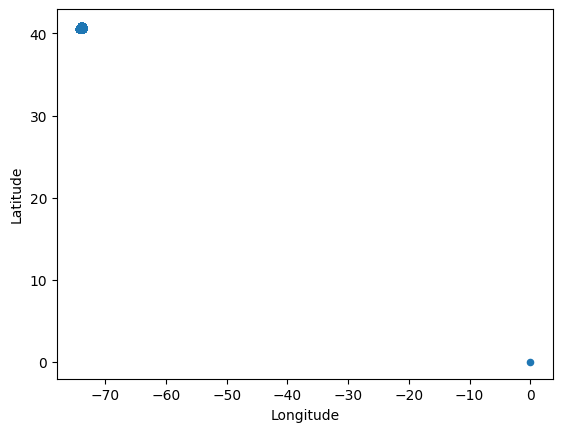

In [8]:
filtered_df.plot (
    kind='scatter',
    x = 'Longitude',
    y = 'Latitude'
)

In [9]:
clean_filter = (filtered_df.Latitude > 40) & (filtered_df.Latitude < 41) & (filtered_df.Longitude < -72) & (filtered_df.Longitude > -74.5)
cleandf = filtered_df[clean_filter]
# Manhattan Arrests
man_df = cleandf[cleandf['ARREST_BORO'] == 'M']
man_df.describe()

,Latitude,Longitude
count,39651.000000,39651.000000
mean,40.772491,-73.971003
std,0.041487,0.025035
min,40.701505,-74.017166
25%,40.738755,-73.991169
50%,40.762227,-73.979704
75%,40.804380,-73.945468
max,40.872636,-73.911226


<Axes: xlabel='Longitude', ylabel='Latitude'>

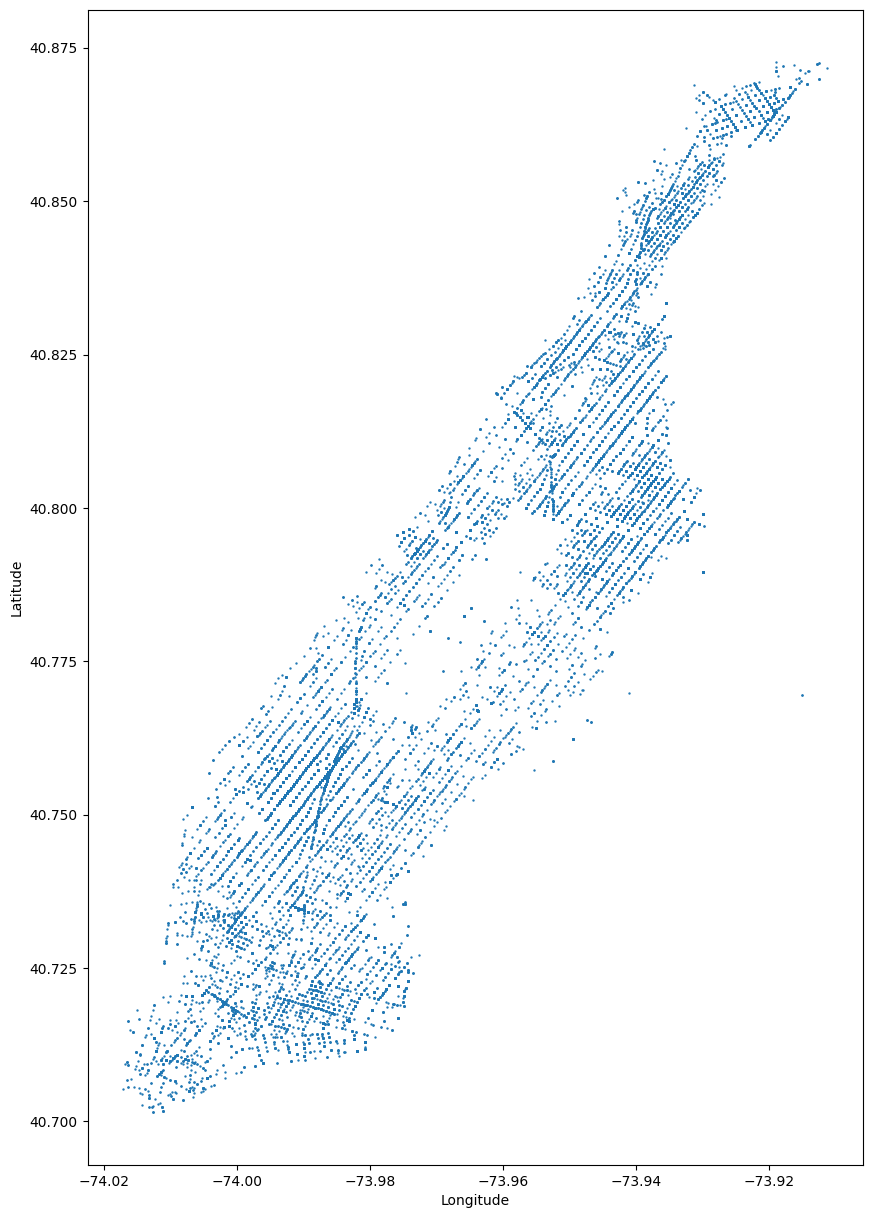

In [33]:
man_df.plot (
    kind='scatter',
    x = 'Longitude',
    y = 'Latitude',
    figsize = (10,15),
    s = 0.5
)

In [11]:
man_df

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
3,01/04/2023,STRANGULATION 1ST,FELONY ASSAULT,F,M,25-44,M,BLACK,40.821797,-73.943457
6,01/23/2023,STRANGULATION 1ST,FELONY ASSAULT,F,M,25-44,M,BLACK,40.815904,-73.945123
8,01/25/2023,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,M,45-64,M,BLACK,40.757232,-73.989792
9,03/17/2023,"BURGLARY,UNCLASSIFIED,UNKNOWN",BURGLARY,F,M,45-64,M,BLACK,40.799102,-73.968541
15,04/13/2023,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,M,25-44,M,BLACK,40.794507,-73.966322
...,...,...,...,...,...,...,...,...,...,...
170073,08/10/2023,"STOLEN PROPERTY 3,POSSESSION",POSSESSION OF STOLEN PROPERTY,M,M,18-24,M,BLACK,40.737074,-73.982962
170074,09/17/2023,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,M,M,45-64,F,BLACK,40.805388,-73.937736
170082,09/08/2023,"FORGERY,ETC.-MISD.",OFFENSES INVOLVING FRAUD,M,M,25-44,M,BLACK,40.799985,-73.944847
170083,07/14/2023,"FORGERY,ETC.-MISD.",OFFENSES INVOLVING FRAUD,M,M,18-24,F,WHITE HISPANIC,40.807094,-73.943873


In [23]:
# Define the bin edges for latitude and longitude
# Latitude: 40.7 to 40.9
# Longitude: -74.05 to -73.9

# 40.701505	-74.017166
# 40.872636	-73.911226

lat_bins = [40.7 + i * 0.001 for i in range(0, 201)]
lon_bins = [-74.05 + i * 0.001 for i in range(0, 151)]

# Create labels for the bins
lat_labels = [f'lat_{i}' for i in range(len(lat_bins) - 1)]
lon_labels = [f'lon_{i}' for i in range(len(lon_bins) - 1)]

# Bin the latitude and longitude columns
man_df['lat_bin'] = pd.cut(man_df['Latitude'], bins=lat_bins, labels=lat_labels, include_lowest=True)
man_df['lon_bin'] = pd.cut(man_df['Longitude'], bins=lon_bins, labels=lon_labels, include_lowest=True)

# Combine the labels into a single column
man_df['lat_lon_bin'] = man_df['lat_bin'].astype(str) + '_' + man_df['lon_bin'].astype(str)

/var/folders/mr/3rp6nsn120d5z44_dyb87mxm0000gn/T/ipykernel_15479/3471037678.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_df['lat_bin'] = pd.cut(man_df['Latitude'], bins=lat_bins, labels=lat_labels, include_lowest=True)
/var/folders/mr/3rp6nsn120d5z44_dyb87mxm0000gn/T/ipykernel_15479/3471037678.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_df['lon_bin'] = pd.cut(man_df['Longitude'], bins=lon_bins, labels=lon_labels, include_lowest=True)
/var/folders/mr/3rp6nsn120d5z44_dyb87mxm0000gn/T/

In [30]:
man_df

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,lat_bin,lon_bin,lat_lon_bin
3,01/04/2023,STRANGULATION 1ST,FELONY ASSAULT,F,M,25-44,M,BLACK,40.821797,-73.943457,lat_121,lon_106,lat_121_lon_106
6,01/23/2023,STRANGULATION 1ST,FELONY ASSAULT,F,M,25-44,M,BLACK,40.815904,-73.945123,lat_115,lon_104,lat_115_lon_104
8,01/25/2023,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,M,45-64,M,BLACK,40.757232,-73.989792,lat_57,lon_60,lat_57_lon_60
9,03/17/2023,"BURGLARY,UNCLASSIFIED,UNKNOWN",BURGLARY,F,M,45-64,M,BLACK,40.799102,-73.968541,lat_99,lon_81,lat_99_lon_81
15,04/13/2023,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,M,25-44,M,BLACK,40.794507,-73.966322,lat_94,lon_83,lat_94_lon_83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170073,08/10/2023,"STOLEN PROPERTY 3,POSSESSION",POSSESSION OF STOLEN PROPERTY,M,M,18-24,M,BLACK,40.737074,-73.982962,lat_37,lon_67,lat_37_lon_67
170074,09/17/2023,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,M,M,45-64,F,BLACK,40.805388,-73.937736,lat_105,lon_112,lat_105_lon_112
170082,09/08/2023,"FORGERY,ETC.-MISD.",OFFENSES INVOLVING FRAUD,M,M,25-44,M,BLACK,40.799985,-73.944847,lat_99,lon_105,lat_99_lon_105
170083,07/14/2023,"FORGERY,ETC.-MISD.",OFFENSES INVOLVING FRAUD,M,M,18-24,F,WHITE HISPANIC,40.807094,-73.943873,lat_107,lon_106,lat_107_lon_106


In [25]:
man_df['lat_lon_bin'].value_counts()

lat_lon_bin
lat_50_lon_60      1059
lat_53_lon_55       877
lat_37_lon_67       636
lat_65_lon_64       609
lat_33_lon_44       555
                   ... 
lat_31_lon_39         1
lat_71_lon_101        1
lat_74_lon_68         1
lat_75_lon_64         1
lat_139_lon_113       1
Name: count, Length: 3269, dtype: int64

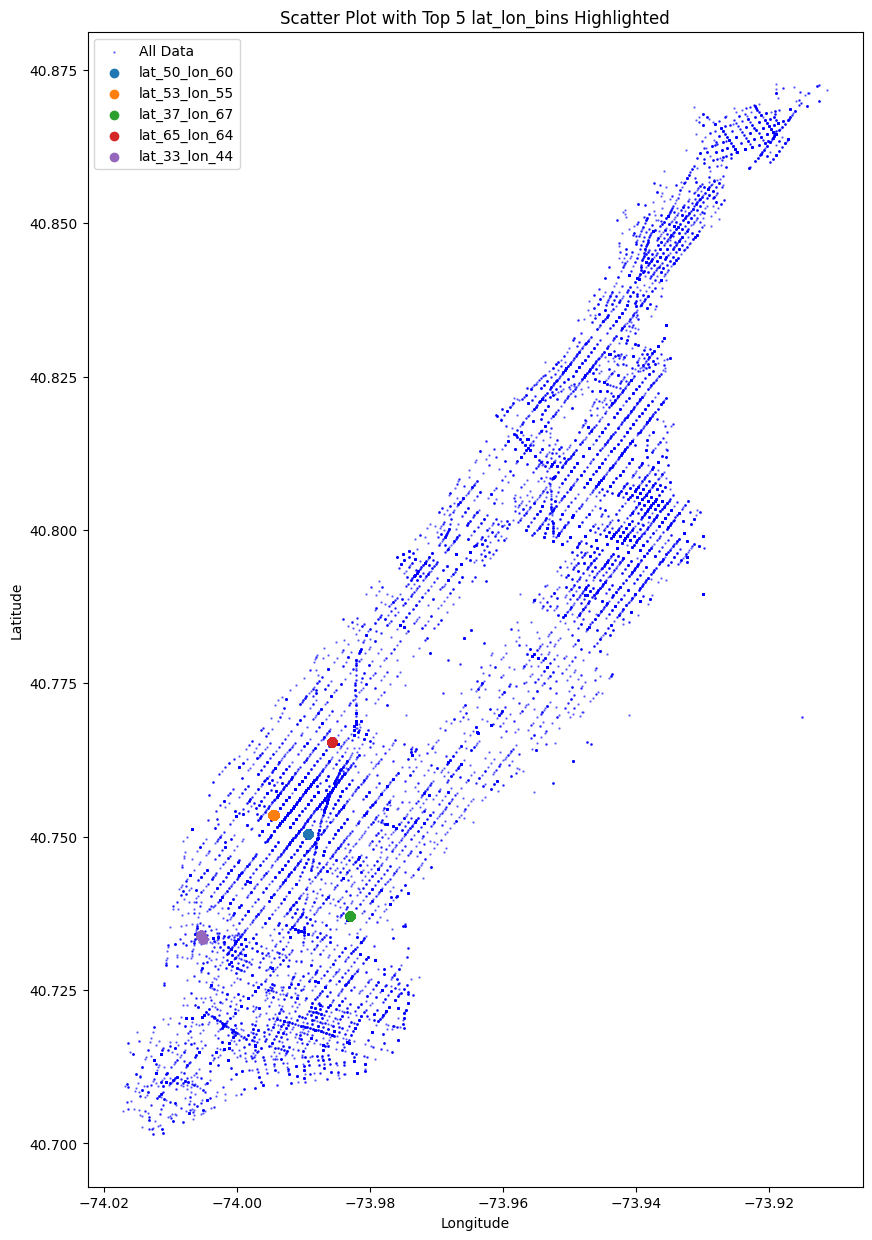

In [43]:
plt.figure(figsize=(10, 15))
plt.scatter(man_df['Longitude'], man_df['Latitude'], c='blue', label='All Data', alpha=0.5, s=0.5)

# Identify the top 5 lat_lon_bins
top_bins = man_df['lat_lon_bin'].value_counts().nlargest(5).index

# Highlight the top 5 lat_lon_bins with different colors
for bin_value in top_bins:
    bin_data = man_df[man_df['lat_lon_bin'] == bin_value]
    plt.scatter(bin_data['Longitude'], bin_data['Latitude'], label=bin_value, alpha=1)

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Top 5 lat_lon_bins Highlighted')
plt.legend()

# Show the plot
plt.show()